# Coursework B: MNIST Noise Analysis

## Introduction:

In this notebook, we introduce random noise to MNIST images through a function that adds noise contributions drawn from a uniform distribution. We aim to train a neural network on the MNIST dataset to achieve acceptable performance, specifically a test accuracy of 95% or higher. Subsequently, without retraining the network, we explore the relationship between test accuracy and the level of noise added to the dataset. Following this, we retrain the neural network from scratch, incorporating noise into the training samples, and repeat the test accuracy analysis. The objective is to identify the optimal level of noise that maximizes performance, with a careful consideration of how performance is defined in this context.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style
import matplotlib as mpl

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.15.0


1. Write a function that adds random noise to MNIST images. For each pixel in the MNIST image the function should add a random noise contribution drawn from a uniform distribution from 0 to 𝑦𝑛𝑜𝑖𝑠𝑒, where 𝑦𝑛𝑜𝑖𝑠𝑒 is a configurable parameter.

In [ ]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
def image_noise(images, noise):
    """
    Add random noise to an array of images.

    Parameters:
    - images (numpy.ndarray): Input array of images with shape (num_images, height, width, channels).
    - noise (float): Maximum amplitude of the random noise to be added.

    Returns:
    - numpy.ndarray: Noisy images with values clipped between 0 and 1.

    """
    # Generate random noise with values between 0 and the specified noise amplitude.
    noise_array = np.random.uniform(0, noise, images.shape)

    # Add the generated noise to the input images.
    noisy_image = images + noise_array

    return noisy_image


2. Train a neural network on the MNIST dataset such that it gets acceptable performance (e.g a test accuracy of 95% or higher)

In [ ]:
# Building a simple neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
# Compile the neural network model with specified loss function
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

In [ ]:
#training the model
history = model.fit(train_images, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 7s 8ms/step - loss: 1.0540 - accuracy: 0.7514
Epoch 2/30
600/600 [==============================] - 6s 9ms/step - loss: 0.4897 - accuracy: 0.8755
Epoch 3/30
600/600 [==============================] - 7s 11ms/step - loss: 0.4019 - accuracy: 0.8917
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3624 - accuracy: 0.8995
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.9051
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3198 - accuracy: 0.9100
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3055 - accuracy: 0.9138
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2933 - accuracy: 0.9177
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2826 - accuracy: 0.9203
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2730 - accuracy: 0.924

(10000, 28, 28)
313/313 - 1s - loss: 0.1719 - accuracy: 0.9500 - 631ms/epoch - 2ms/step
The model has achieved an accuracy of  0.949999988079071


Text(0.5, 1.0, 'Training Accuracy Over Epochs')

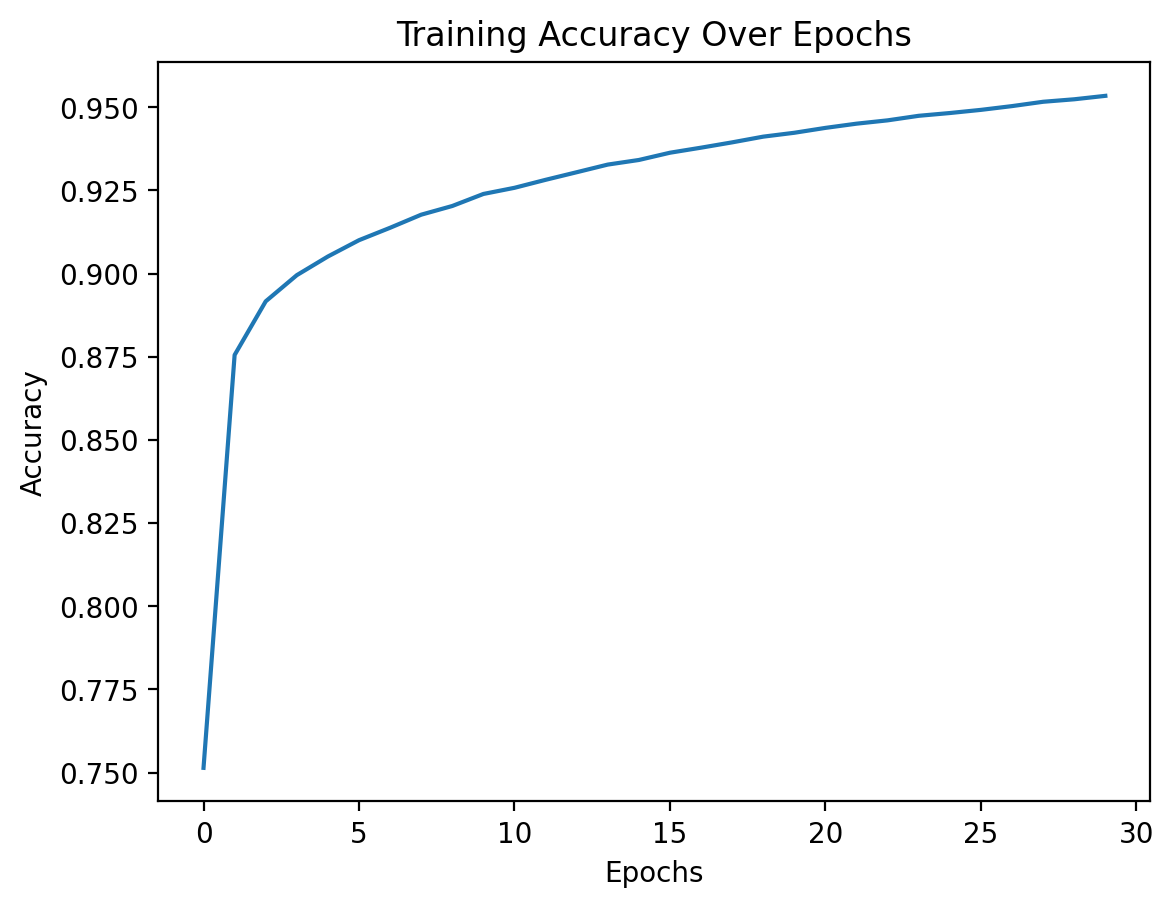

In [ ]:
print(np.shape(test_images))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('The model has achieved an accuracy of ', test_acc)

epoch = np.arange(0,30,1)

#plot
plt.plot(epoch,history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')

3. Without retraining your network use this network to make a plot of test accuracy vs  𝑦𝑛𝑜𝑖𝑠𝑒   (so run the network repeatedly on the test dataset each time adding a differing noise contribution)


noise:0.0, test accuracy: 0.949999988079071
noise:0.05263157894736842, test accuracy: 0.9492999911308289
noise:0.10526315789473684, test accuracy: 0.9455999732017517
noise:0.15789473684210525, test accuracy: 0.9376999735832214
noise:0.21052631578947367, test accuracy: 0.9146000146865845
noise:0.2631578947368421, test accuracy: 0.8766999840736389
noise:0.3157894736842105, test accuracy: 0.8256999850273132
noise:0.3684210526315789, test accuracy: 0.7821000218391418
noise:0.42105263157894735, test accuracy: 0.746999979019165
noise:0.47368421052631576, test accuracy: 0.7146000266075134
noise:0.5263157894736842, test accuracy: 0.6866999864578247
noise:0.5789473684210527, test accuracy: 0.6557999849319458
noise:0.631578947368421, test accuracy: 0.625
noise:0.6842105263157894, test accuracy: 0.592199981212616
noise:0.7368421052631579, test accuracy: 0.5627999901771545
noise:0.7894736842105263, test accuracy: 0.5333999991416931
noise:0.8421052631578947, test accuracy: 0.5091999769210815
noise:

Text(0.5, 1.0, 'Change in Accuracy with increasing noise')

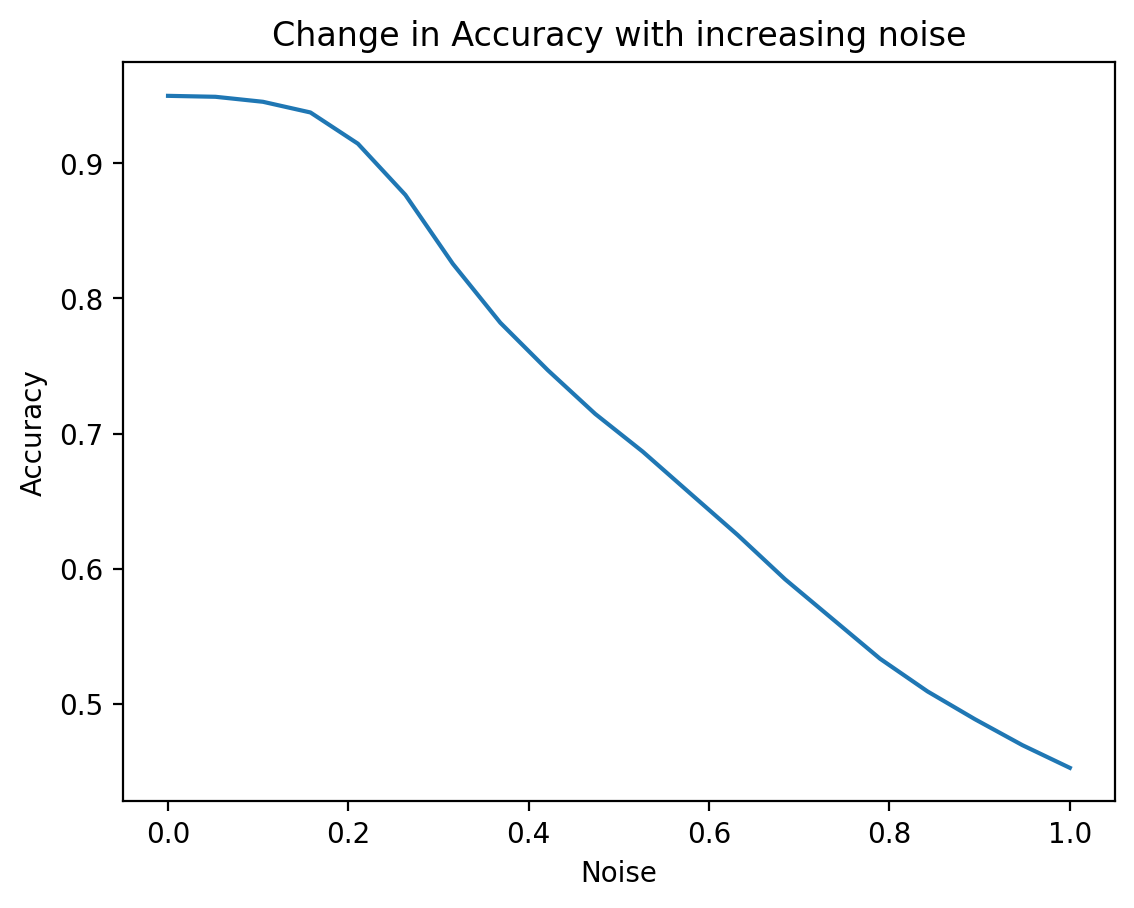

In [ ]:
noise_range = np.linspace(0,1,20)

#storage
accuracy = []

# Loop through each noise level in the range
for k in noise_range:
  noisy_images = image_noise(test_images,k)
  test_loss, test_acc = model.evaluate(noisy_images,  test_labels, verbose=0)
  accuracy.append(test_acc)

  print(f'noise:{k}, test accuracy: {test_acc}')

plt.plot(noise_range, accuracy)
plt.xlabel('Noise')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy with increasing noise')

4. Now retrain your neural network using the training sample but with some level of noise added to the sample and then redo task 3

In [ ]:
# Re-training model for a set noise of 0.2
history2 = model.fit(image_noise(train_images, 0.2), train_labels, batch_size=100, epochs=30)


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1749 - accuracy: 0.9518
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1688 - accuracy: 0.9533
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1654 - accuracy: 0.9538
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1621 - accuracy: 0.9548
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1590 - accuracy: 0.9560
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1562 - accuracy: 0.9568
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9578
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1509 - accuracy: 0.9581
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1483 - accuracy: 0.9591
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1458 - accuracy: 0.9596

313/313 - 0s - loss: 0.1240 - accuracy: 0.9638 - 474ms/epoch - 2ms/step
The model has achieved an accuracy of  0.9638000130653381


Text(0.5, 1.0, 'Training Accuracy with 0.2 noise')

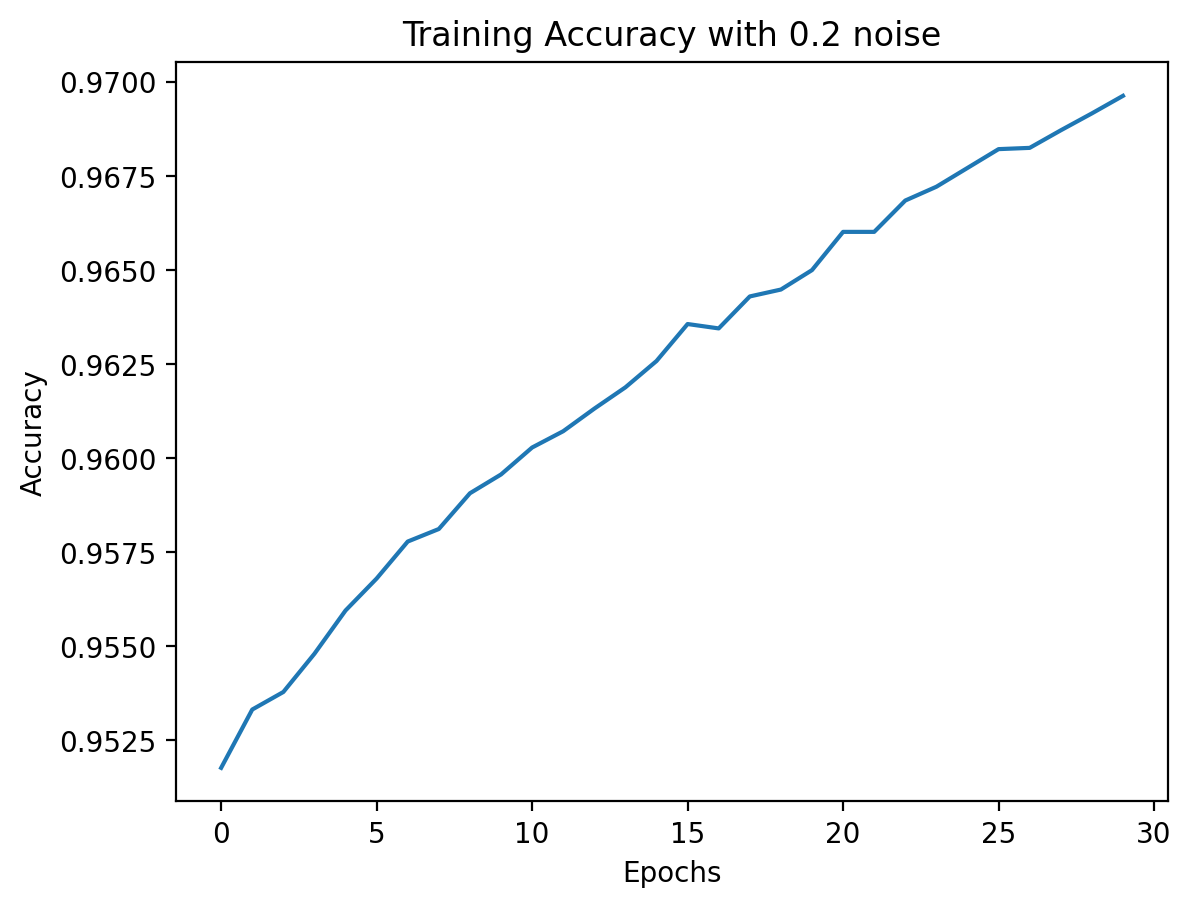

In [ ]:
test_loss, test_acc = model.evaluate(image_noise(test_images,0.2),  test_labels, verbose=2)
print('The model has achieved an accuracy of ', test_acc)

epoch = np.arange(0,30,1)
plt.plot(epoch,history2.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy with 0.2 noise')

noise:0.0, test accuracy: 0.9585999846458435
noise:0.05263157894736842, test accuracy: 0.9610999822616577
noise:0.10526315789473684, test accuracy: 0.9631999731063843
noise:0.15789473684210525, test accuracy: 0.9648000001907349
noise:0.21052631578947367, test accuracy: 0.9638000130653381
noise:0.2631578947368421, test accuracy: 0.9625999927520752
noise:0.3157894736842105, test accuracy: 0.9606000185012817
noise:0.3684210526315789, test accuracy: 0.95660001039505
noise:0.42105263157894735, test accuracy: 0.9510999917984009
noise:0.47368421052631576, test accuracy: 0.9376999735832214
noise:0.5263157894736842, test accuracy: 0.9233999848365784
noise:0.5789473684210527, test accuracy: 0.9014999866485596
noise:0.631578947368421, test accuracy: 0.8756999969482422
noise:0.6842105263157894, test accuracy: 0.8478999733924866
noise:0.7368421052631579, test accuracy: 0.8173999786376953
noise:0.7894736842105263, test accuracy: 0.7896999716758728
noise:0.8421052631578947, test accuracy: 0.763700008

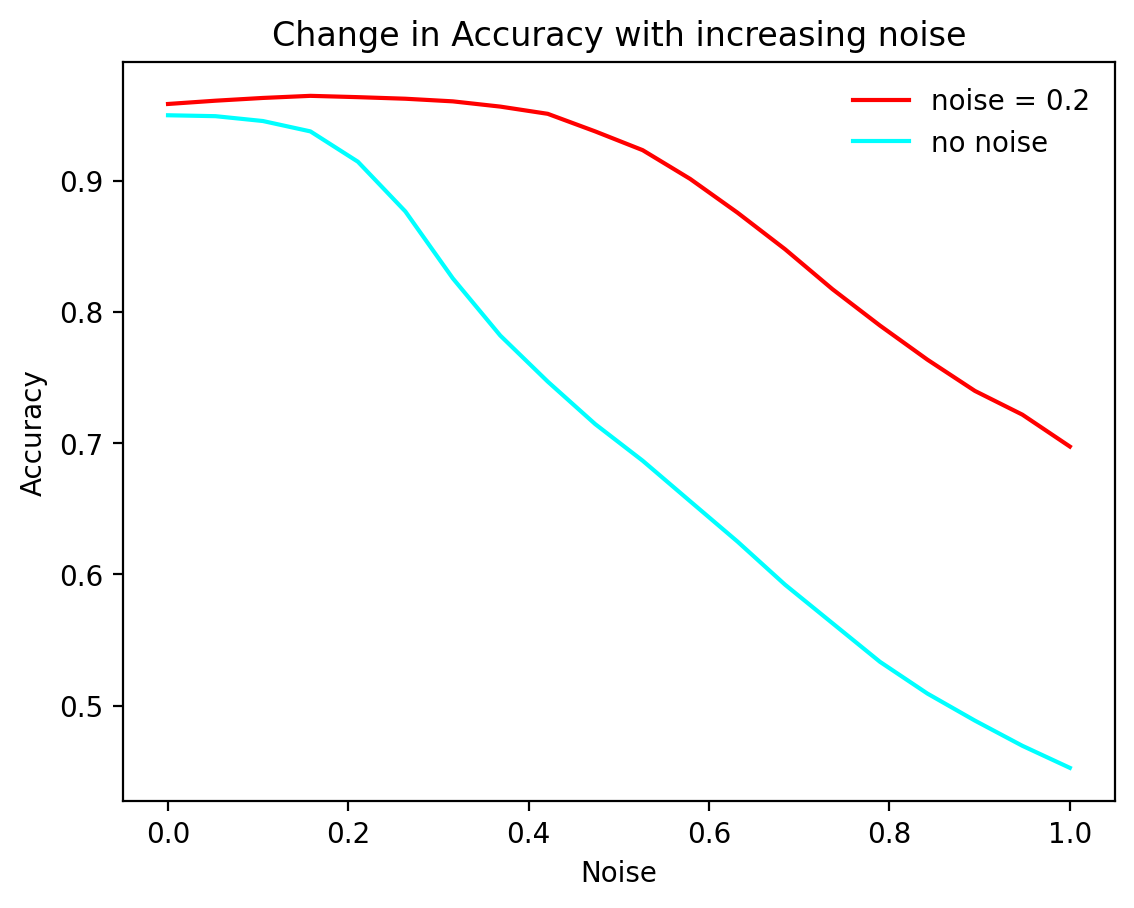

In [ ]:
noise_range = np.linspace(0,1,20)

noise_accuracy = []

for k in noise_range:
  noisy_images = image_noise(test_images,k)
  test_loss, test_acc = model.evaluate(noisy_images,  test_labels, verbose=0)
  noise_accuracy.append(test_acc)

  print(f'noise:{k}, test accuracy: {test_acc}')

plt.plot(noise_range, noise_accuracy, color='red',label ='noise = 0.2')
plt.plot(noise_range, accuracy,color='cyan', label ='no noise')
plt.xlabel('Noise')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy with increasing noise')
plt.legend()

## Comment:
Looking at the graph above, we can see that training our model with added noise significantly changes the accuracy of our model over different noise levels.

Both curves start at roughly 0.95 accuracy with 0.0 noise. At 1.0 noise the accuracy of the blue curve drops to approx 0.45 , where as the red curve only drops to approx 0.65 accuracy.

This suggests that training a model with some added noise is beneficial as the accuracy won't drop so low for higher noise levels.  

5. What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])


Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.1269 - accuracy: 0.7323
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5021 - accuracy: 0.8733
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4046 - accuracy: 0.8915
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3612 - accuracy: 0.9005
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3347 - accuracy: 0.9068
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3155 - accuracy: 0.9122
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3005 - accuracy: 0.9165
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2881 - accuracy: 0.9195
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 0.2774 - accuracy: 0.9216
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2680 - accuracy: 0.9249

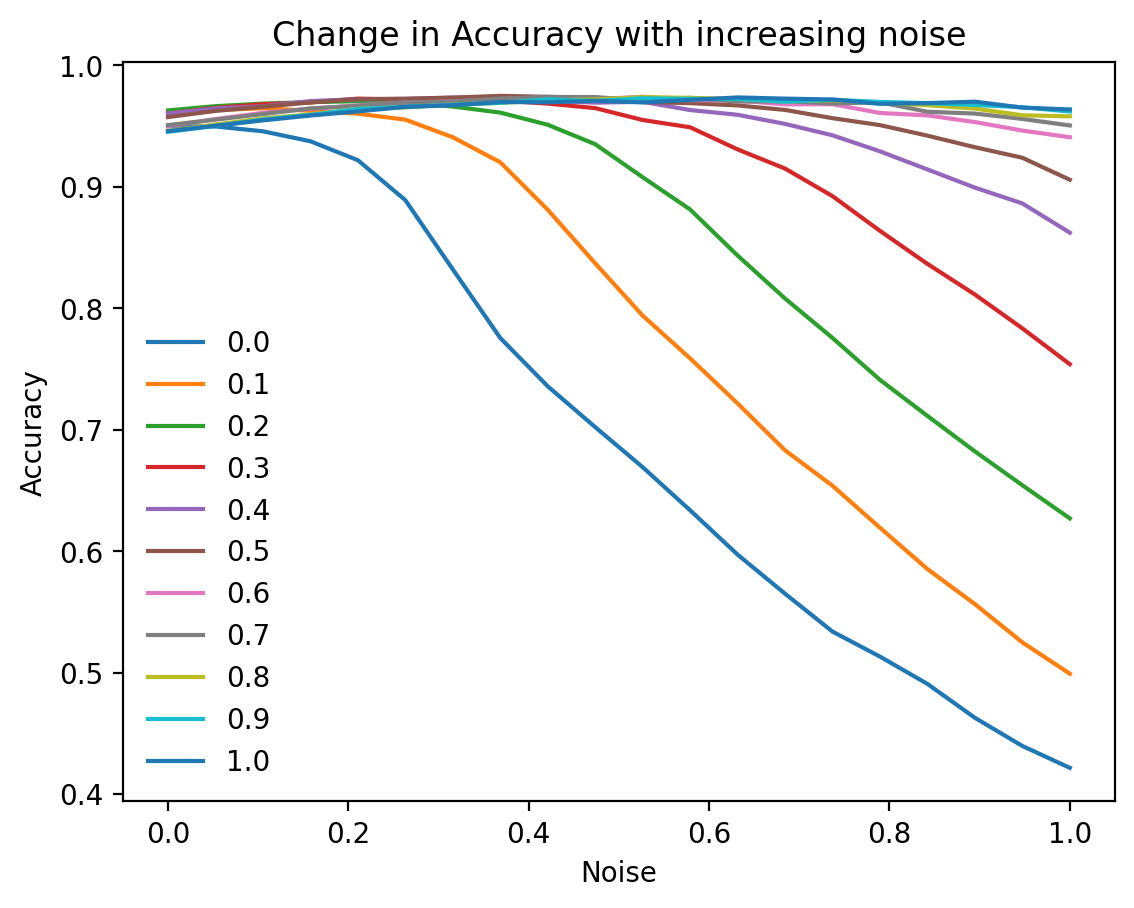

In [ ]:
noise_accuracy = []
# an array of 11 noise levels for retraining
y_training_noise = np.linspace(0, 1, 11)
# an array of noise values to test the models accuracy
noise_range = np.linspace(0, 1, 20)

# Loop through each noise level for retraining
for i in range(len(y_training_noise)):
    # Retrain the model with added noise to the training images
    history = model.fit(image_noise(train_images, y_training_noise[i]), train_labels, batch_size=100, epochs=30)

    current_noise_accuracy = []

    # Evaluate the model on the test dataset with varying noise levels
    for j in range(len(noise_range)):
        test_loss, test_acc = model.evaluate(image_noise(test_images, noise_range[j]), test_labels, verbose=0)
        current_noise_accuracy.append(test_acc)

    # Store accuracy values for the current noise level during retraining
    noise_accuracy.append(current_noise_accuracy)

    # Plot the change in accuracy for the current noise level
    plt.plot(noise_range, current_noise_accuracy, label='{0:.1f}'.format(y_training_noise[i]))


plt.xlabel('Noise')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy with increasing noise')
plt.legend()
plt.show()


## Comment 1:
I would define the performance by the difference in accuracy at noise 0.0 and 1.0, as this would show the drop in accuracy for each model as the noise was increased. A better-performing model would show less decline in accuracy when faced with increased noise.The goal is to find models that remain reliable and perform consistently, even in noisy conditions.




## Comment 2:

Looking at the graph above, we can observe the effect of noise on the accuracy of various models. Generally, all models start with the same accuracy at the 0.0 noise level. However, as noise increases, there is a noticeable trend indicating that models trained with progressively higher levels of noise experience a slower decline in accuracy. Based on my definition of performance, it suggests that models trained with higher levels of noise perform better than those trained with lower levels of noise.

Upon examining individual curves and considering the observed general trend, it becomes apparent that the optimal level of noise to add to the training dataset for maximizing performance is 0.9 - 1.0. Both curves remain relatively flat throughout noise levels from 0.0 to 1.0 and both curve 0.9 and 1.0 have the highest levels of accuracy at 1.0 noise.


# Conclusion:

In summary, our exploration into the impact of noise on the MNIST dataset reveals a clear link between noise levels and neural network accuracy. Models trained with higher noise levels demonstrate improved resilience, maintaining accuracy even in the presence of noise. Retraining experiments confirm the positive impact of noise on model adaptability. When comparing test accuracy curves, we observe variations in performance with different noise levels. Models trained at noise levels around 1.0 showcase consistent performance amid heightened noise.